# Taking a look at COCO Dataset
The Common Objects in Context (COCO) dataset is a collection of images containing one or more common objects.  Each object, or instance, has a category label, a bounding box and a segmentation mask.  

In [1]:
import sys
sys.path.append('/Users/jack/git_repos/fastai_dev/dev')

In [49]:
from local.data.all import *
from local.vision.core import *

from pycocotools.coco import COCO
import io

In [4]:
SOURCE = Path('/Users/jack/datasets/coco')

The data is stored in Google cloud storage.  Access to the data is at http://cocodataset.org/#download, where instructions are also provided. I already had `gsutil` installed, so I used this.  

I followed the example and downloaded 2017's validation set images. However, I couldn't use `gsutil` to download the annotation files; it says that I do not have permission.  Instead, I went to the top of the web page, and clicked the link for the annotation file, downloading it via the browser.  

In [42]:
# ! mkdir mkdir val2017
# ! gsutil -m rsync gs://images.cocodataset.org/val2017 val2017

# This command didn't work.  It says that my google account does not have permission for access.
# ! gsutil -m rsync gs://images.cocodataset.org/annotations .  

In [36]:
list((SOURCE/'info2017'/'annotations_trainval2017'/'annotations').ls())

[PosixPath('/Users/jack/datasets/coco/info2017/annotations_trainval2017/annotations/person_keypoints_val2017.json'),
 PosixPath('/Users/jack/datasets/coco/info2017/annotations_trainval2017/annotations/captions_val2017.json'),
 PosixPath('/Users/jack/datasets/coco/info2017/annotations_trainval2017/annotations/instances_val2017.json'),
 PosixPath('/Users/jack/datasets/coco/info2017/annotations_trainval2017/annotations/person_keypoints_train2017.json'),
 PosixPath('/Users/jack/datasets/coco/info2017/annotations_trainval2017/annotations/instances_train2017.json'),
 PosixPath('/Users/jack/datasets/coco/info2017/annotations_trainval2017/annotations/captions_train2017.json')]

In [37]:
info_json = json.load((SOURCE/'info2017'/'annotations_trainval2017'/'annotations'/'instances_val2017.json'))

In [38]:
info_json.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [44]:
coco = COCO((SOURCE/'info2017'/'annotations_trainval2017'/'annotations'/'instances_val2017.json'))

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!


In [64]:
len(coco.getImgIds()), coco.getImgIds()[:10]

(5000,
 [397133, 37777, 252219, 87038, 174482, 403385, 6818, 480985, 458054, 331352])

In [181]:
imgid = random.choice(coco.getImgIds())

In [182]:
imginfo = coco.loadImgs(ids=imgid)[0]
imginfo

{'license': 3,
 'file_name': '000000450100.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000450100.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-20 20:15:34',
 'flickr_url': 'http://farm4.staticflickr.com/3695/9043330973_2568f5324c_z.jpg',
 'id': 450100}

#### The image

In [183]:
imgpath = SOURCE/'val2017'/imginfo['file_name']

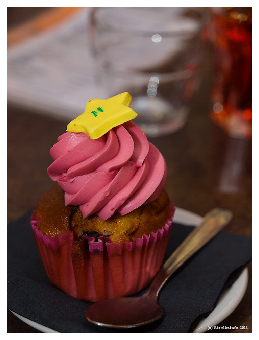

In [184]:
PILImage.create(imgpath).show(figsize=(10, 6));

#### Annotation

In [185]:
annids = coco.getAnnIds(imgIds=imgid)
annids

[706820, 1084058, 1619618, 1884141]

In [186]:
anns = coco.loadAnns(ids=annids)
len(anns), anns[0].keys()

(4,
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']))

#### Segmentation mask

In [223]:
mask = coco.annToMask(anns[1])

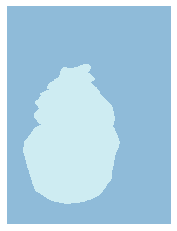

In [224]:
PILMask.create(mask).show()

#### Bouding box (`bbox`)
And its area.

In [225]:
anns[0]['bbox'], anns[1]['area']

([151.99, 393.8, 291.42, 238.66], 82854.28420000001)

In [226]:
TensorBBox(anns[1]['bbox'])

tensor([ 46.1200, 169.4600, 284.3000, 410.8500])

#### Category

In [227]:
anns[1]['category_id']

61

In [228]:
coco.cats[anns[1]['category_id']]['name']

'cake'

In [211]:
cococatid2o = {k: d['name'] for k, d in coco.cats.items()}

In [229]:
cococatid2o[anns[1]['category_id']]

'cake'

In [215]:
#vocab = [v for _, v in cococatid2o.items()]
#cats = Categorize(vocab, add_na=True)

In [230]:
BBoxLabels(cococatid2o[anns[1]['category_id']])

(#1) [cake]

#### Iscrowd

In [231]:
anns[1]['iscrowd']

0

# - Fin